In [2]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(egg)
library(grid)
library(tidyverse)
library(ggExtra)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


 要求されたパッケージ gridExtra をロード中です 


 次のパッケージを付け加えます: ‘gridExtra’ 


 以下のオブジェクトは ‘package:dplyr’ からマスクされています:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
data = read.csv("../Input/20230614_parsed_PPI_data.csv")

In [4]:
unique(data$State)

[1] "Anc"     "AB"      "A"       "Vehicle" "B"

In [5]:
unique(data$Ortholog.Species)

[1] "T.delbrueckii"       "V.polyspora"         "S.bayanusvar.uvarum"
 [4] "S.mikatae"           "S.kudriavzevii"      "K.africana"         
 [7] "T.blattae"           "Vehicle"             "N.dairenensis"      
[10] "N.castellii"         "K.naganishii"        "Z.rouxii"           
[13] "C.glabrata"          "T.phaffii"           "S.cerevisiae"

In [6]:
nrow(data)
data = data %>% filter(PPI.Scer != "NA")%>% filter(PPI.Scer != 0)
nrow(data)

[1] 1675

[1] 1613

In [7]:
unique(data$Ortholog.Species)

[1] "T.delbrueckii"       "V.polyspora"         "S.bayanusvar.uvarum"
 [4] "S.mikatae"           "S.kudriavzevii"      "K.africana"         
 [7] "T.blattae"           "Vehicle"             "N.dairenensis"      
[10] "N.castellii"         "K.naganishii"        "Z.rouxii"           
[13] "C.glabrata"          "T.phaffii"           "S.cerevisiae"

In [8]:
data$State = factor(data$State,levels=c("Anc","AB","A","B","Vehicle"))


In [9]:
data = data %>% mutate(MaxPPI=pmax(PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc, na.rm = TRUE))
#data = data %>% rowwise() %>% mutate(SumPPI=sum(PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc, na.rm = TRUE))
data$AvePPI = rowMeans(data[,9:11], na.rm=TRUE)

#data = data %>% filter(AvePPI != "NaN")

data$RelPPI = data$AvePPI/data$PPI.Scer
data$RelPPIMax = data$MaxPPI/data$PPI.Scer
#unique(data$Ortholog.Species)
head(data)

,PPI_partner.Gene,PPI_partner.ORF,Ortholog.Species,State,PPI.NA,Ortholog.GeneA,Ortholog.GeneB,Ortholog.GeneAnc,PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc,PPI.A_div_B,PPI.Scer,PPI.Vehicle,MaxPPI,AvePPI,RelPPI,RelPPIMax
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YLR027C,AAT2,T.delbrueckii,Anc,No,,,TDEL0E05230,NA,NA,51992.75,1.000000,10368.75,4043,51992.75,51992.75,5.014370,5.014370
2,YLR027C,AAT2,V.polyspora,AB,No,Kpol_1002.53,Kpol_1033.51,,29039.75,15932.00,NA,1.822731,10368.75,4043,29039.75,22485.88,2.168620,2.800699
3,YLR027C,AAT2,S.bayanusvar.uvarum,A,No,Suva_16.102,,,25431.25,NA,NA,25431.250000,10368.75,4043,25431.25,25431.25,2.452682,2.452682
4,YLR027C,AAT2,S.mikatae,A,No,Smik_6.409,,,10516.75,NA,NA,10516.750000,10368.75,4043,10516.75,10516.75,1.014274,1.014274
5,YLR027C,AAT2,S.kudriavzevii,A,No,Skud_16.75,,,10875.50,NA,NA,10875.500000,10368.75,4043,10875.50,10875.50,1.048873,1.048873
6,YLR027C,AAT2,K.africana,AB,No,KAFR0K00320,KAFR0C02290,,73575.50,31606.75,NA,2.327841,10368.75,4043,73575.50,52591.12,5.072080,7.095889


In [10]:
#data %>% filter(Ortholog.Species=="Vehicle")

In [11]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Vwhicle
data_v = data_complete %>% filter(State=="Vehicle")
for (species in unique(data_v$Ortholog.Species) ){
data_sp= data_v %>% filter(Ortholog.Species==species)

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.Anc+1))) + 
                       geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
 geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


In [12]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Vwhicle
data_v = data_complete %>% filter(State=="Anc")
for (species in unique(data_v$Ortholog.Species) ){
data_sp= data_v %>% filter(Ortholog.Species==species)

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.Anc+1))) + 
            geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
            geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [13]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Copy A
data_A = data_complete %>% filter(State=="A")
for (species in unique(data_A$Ortholog.Species) ){
data_sp= data_A %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneA+1))) + 
                       geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
 geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


In [14]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Copy B
data_B = data_complete %>% filter(State=="B")
for (species in unique(data_B$Ortholog.Species) ){
data_sp= data_B %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneB+1))) + 
                      geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
  geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_vsScer_scatter.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [46]:
# Scatter plot of PPI score vs Scer
data_complete= data %>% filter(PPI.NA=="No")

# With Copy AB
data_A = data_complete %>% filter(State=="AB")
for (species in unique(data_A$Ortholog.Species) ){
data_sp= data_A %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneA+1))) + 
                 geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
       geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_vsScer_scatter_A.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}

data_B = data_complete %>% filter(State=="AB")
for (species in unique(data_B$Ortholog.Species) ){
data_sp= data_B %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Scer+1),y=log10(PPI.Ortholog.GeneB+1))) + 
                      geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
  geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ ~italic(Scer)~ 'PPI score'))+
         ylab(bquote(~Log[10]~ 'PPI score'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_vsScer_scatter_B.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}


data_AB = data_complete %>% filter(State=="AB")
for (species in unique(data_AB$Ortholog.Species) ){
data_sp= data_AB %>% filter(Ortholog.Species==species)%>% filter(PPI.NA=="No")

scatter  = ggplot(data=data_sp,aes(x=log10(PPI.Ortholog.GeneA+1),y=log10(PPI.Ortholog.GeneB+1))) + 
                        geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.75, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ 'PPI score A'))+
         ylab(bquote(~Log[10]~ 'PPI score B'))+
    facet_wrap(~Ortholog.Species,strip.position="top")

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    #grid.newpage()
    #grid.draw(p)
    ggsave(plot=p,paste("../Output/",species,"_scatter_AvsB.pdf" ,sep=""),width=unit(3,"cm"),height=unit(3,"cm"))
}



Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


In [15]:
data_complete= data %>% filter(PPI.NA=="No")%>% filter(State=="AB")%>% filter(Ortholog.Species!="S.cerevisiae")

data_complete$Ortholog.Species = factor(data_complete$Ortholog.Species, levels= c('N.castellii','V.polyspora','T.phaffii','K.naganishii','K.africana','N.dairenensis','T.blattae'))

head(data_complete)


,PPI_partner.Gene,PPI_partner.ORF,Ortholog.Species,State,PPI.NA,Ortholog.GeneA,Ortholog.GeneB,Ortholog.GeneAnc,PPI.Ortholog.GeneA,PPI.Ortholog.GeneB,PPI.Ortholog.Anc,PPI.A_div_B,PPI.Scer,PPI.Vehicle,MaxPPI,AvePPI,RelPPI,RelPPIMax
,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YLR027C,AAT2,V.polyspora,AB,No,Kpol_1002.53,Kpol_1033.51,,29039.75,15932.00,NA,1.82273098,10368.75,4043,29039.75,22485.88,2.168620,2.800699
2,YLR027C,AAT2,K.africana,AB,No,KAFR0K00320,KAFR0C02290,,73575.50,31606.75,NA,2.32784136,10368.75,4043,73575.50,52591.12,5.072080,7.095889
3,YLR027C,AAT2,T.blattae,AB,No,TBLA0A02040,TBLA0B05310,,5612.00,58258.00,NA,0.09633012,10368.75,4043,58258.00,31935.00,3.079928,5.618614
4,YLR027C,AAT2,N.dairenensis,AB,No,NDAI0F01640,NDAI0I01070,,3752.00,49981.00,NA,0.07506853,10368.75,4043,49981.00,26866.50,2.591103,4.820350
5,YLR027C,AAT2,N.castellii,AB,No,NCAS0A01090,NCAS0D03820,,4660.75,23907.00,NA,0.19495336,10368.75,4043,23907.00,14283.88,1.377589,2.305678
6,YLR027C,AAT2,K.naganishii,AB,No,KNAG0D01130,KNAG0F01980,,9510.50,54301.25,NA,0.17514330,10368.75,4043,54301.25,31905.88,3.077119,5.237010


In [16]:
write.csv(data_complete,"../Output/PPI_data_for_scatterplotannotation.csv")


Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


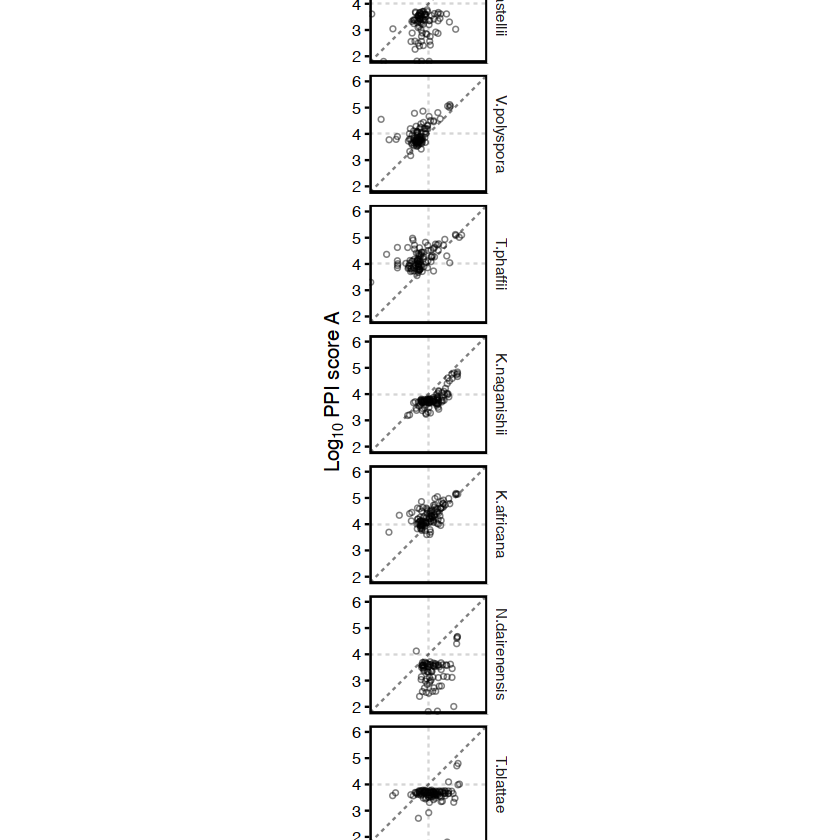

In [13]:




scatter  = ggplot(data=data_complete,aes(x=log10(PPI.Ortholog.GeneB+1),y=log10(PPI.Ortholog.GeneA+1))) + 
                        geom_hline(yintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_vline(xintercept=log10(10001),linetype="dashed",color="#ababab",alpha=0.5)+
            geom_abline(slope=1.0,linetype="dashed",color="#000000",alpha=0.5)+
geom_point(alpha=0.5,size=1,shape=1,color="#000000")+
            scale_y_continuous(expand=c(0,0),limits=c(1.75,6.25)) +  
            scale_x_continuous(expand=c(0,0),limits=c(1.75,6.25)) + 
            theme(
                    legend.position='none',
                    legend.key = element_blank(),
                    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
                    panel.grid.minor = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.spacing = unit(0.5, "lines"),
                    panel.background = element_blank(),
                    aspect.ratio=1.0,
                    axis.ticks =element_line(color = "#000000", size = 0.5),
                    axis.text.x = element_text(color="#000000",size=9.5),
                    axis.text.y = element_text(color="#000000",size=9.5),
                    panel.border = element_rect(color="#000000", fill = NA,linewidth=1.0),
                    axis.title=element_text(size=12)
                )+ 
        xlab(bquote(~Log[10]~ 'PPI score B'))+
         ylab(bquote(~Log[10]~ 'PPI score A'))+
    facet_wrap(~Ortholog.Species,strip.position="right",nrow=7)

    p <- set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
    grid.newpage()
    grid.draw(p)
    ggsave(plot=p,paste("../Output/PostWGD_ABratio_scatter_l.pdf" ,sep=""),width=unit(3,"cm"),height=unit(10,"cm"))

